## SVM

Accuracy: 0.23214285714285715
              precision    recall  f1-score   support

       angry       0.14      0.17      0.16        40
     disgust       0.32      0.42      0.37        40
        fear       0.16      0.15      0.16        40
       happy       0.26      0.25      0.25        40
     neutral       0.15      0.12      0.14        40
         sad       0.15      0.10      0.12        40
    surprise       0.38      0.40      0.39        40

    accuracy                           0.23       280
   macro avg       0.22      0.23      0.23       280
weighted avg       0.22      0.23      0.23       280



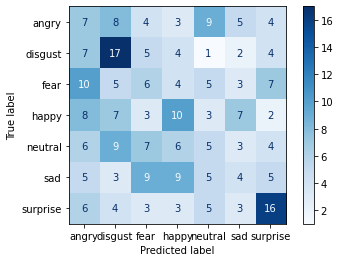

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.svm import SVC
import os
from PIL import Image

# counter to limit training and validation data
trainCounter = 0
valCounter = 0

# Define emotions
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Define directories of training and validation datasets
train_dir = '../datasets/train'
valid_dir = '../datasets/validation'

# Define empty lists for images and corresponding labels
train_images = []
train_labels = []
valid_images = []
valid_labels = []

# Load training images and labels
for emotion in emotions:
    for file in os.listdir(train_dir+'/'+emotion):
        if trainCounter >= 200:
            trainCounter = 0
            break
        image = Image.open(train_dir+'/'+emotion+'/'+file)
        image = image.convert('L')  # Convert to grayscale
        train_images.append(np.array(image).flatten())
        train_labels.append(emotions.index(emotion))
        trainCounter += 1

# Load validation images and labels
for emotion in emotions:
    for file in os.listdir(valid_dir+'/'+emotion):
        if valCounter >= 40:
            valCounter = 0
            break
        image = Image.open(valid_dir+'/'+emotion+'/'+file)
        image = image.convert('L')  # Convert to grayscale
        valid_images.append(np.array(image).flatten())
        valid_labels.append(emotions.index(emotion))
        valCounter += 1

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
valid_images = np.array(valid_images)
valid_labels = np.array(valid_labels)

# Create the SVM model
svm = SVC(kernel='linear', C=1, gamma='auto')

# Train the SVM model
svm.fit(train_images, train_labels)

# Predict labels for the validation data
y_pred = svm.predict(valid_images)

# Calculate accuracy and print classification report
accuracy = svm.score(valid_images, valid_labels)
print('Accuracy:', accuracy)
print(classification_report(valid_labels, y_pred, target_names=emotions))

# Plot the confusion matrix
cm = confusion_matrix(valid_labels, y_pred)
plot_confusion_matrix(svm, valid_images, valid_labels, display_labels=emotions, cmap=plt.cm.Blues)
plt.show()